# AUTHOR: 
MARIA DAROCHA (#300399718)
## AIML431, PROJECT TWO: REINFORCEMENT LEARNING
### DATE: 11/08/2024

### Final Code

In [37]:
# pip install gym

# Reference: 
# https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187

C:\Users\maria\anaconda3\envs\JaxFlax-DLEnviron\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


                   Mean Episode Reward
Episode Milestone                     
1000                            0.0838
2000                            0.1946
3000                            0.2152
4000                            0.3120
5000                            0.3414
6000                            0.3726
7000                            0.3792
8000                            0.3844
9000                            0.4010
10000                           0.4002


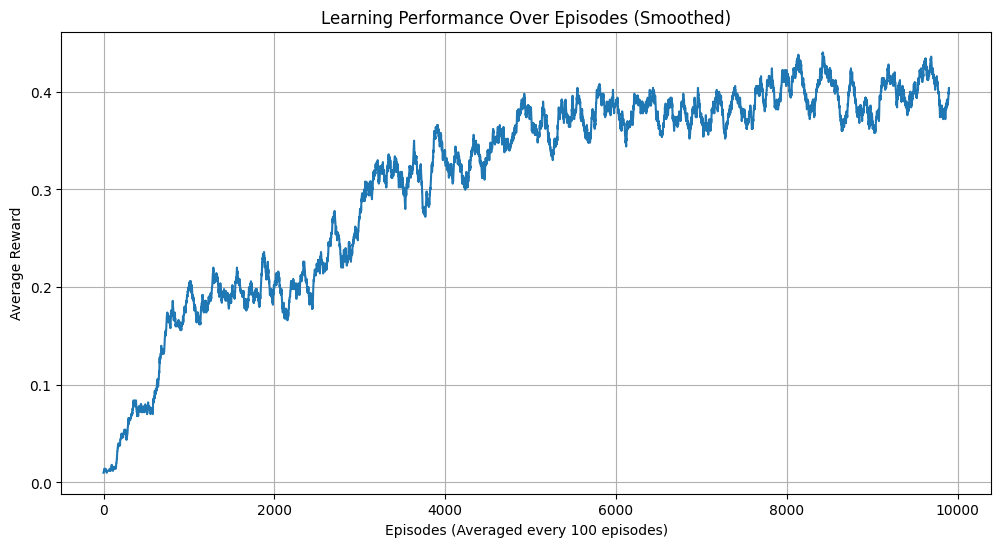

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import pandas as pd

env = gym.make('FrozenLake-v1', is_slippery=True)

# problem conditions
num_runs = 5
all_rewards = []

for run in range(num_runs):
    np.random.seed(run)  

    # initialize Q-table
    Q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    n_episodes = 10000
    max_iter_episode = 100
    exploration_proba = 1  # epislon start = 1
    exploration_decreasing_decay = 0.01
    min_exploration_proba = 0.01
    gamma = 1
    lr = 0.1

    # track rewards per episode
    rewards_per_episode = []

    # iterate over episodes
    for e in range(n_episodes):
        initial_state = env.reset()
        current_state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # extract state index
        done = False
        total_episode_reward = 0
        
        for i in range(max_iter_episode):
            if np.random.uniform(0, 1) < exploration_proba:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[current_state, :])
            
            next_state, reward, done, other_flag, info = env.step(action)  # environment step
            
            # Update Q-table using the Q-learning iteration
            Q_table[current_state, action] = (1 - lr) * Q_table[current_state, action] + lr * (reward + gamma * np.max(Q_table[next_state, :]))
            total_episode_reward += reward
            
            if done:
                break
            
            current_state = next_state
        
        exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay * e))
        rewards_per_episode.append(total_episode_reward)

    all_rewards.append(rewards_per_episode)

# Prepare data (calculate means)
mean_rewards = np.mean(np.array(all_rewards), axis=0)  # average over runs

# Tabulation
data = {
    "Episode Milestone": [(i+1)*1000 for i in range(10)],
    "Mean Episode Reward": [np.mean(mean_rewards[1000*i:1000*(i+1)]) for i in range(10)]
}
df = pd.DataFrame(data)
# index to episode milestones
df.set_index('Episode Milestone', inplace=True)
# float precision format
pd.options.display.float_format = '{:,.4f}'.format
print(df)

# Graph moving average
def moving_average(data, window_size):
    """ Compute moving average using a specific window size """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 100  # adjust smoothing
smoothed_rewards = moving_average(mean_rewards, window_size)

plt.figure(figsize=(12, 6))
plt.plot(smoothed_rewards)
plt.title('Learning Performance Over Episodes (Smoothed)')
plt.xlabel(f'Episodes (Averaged every {window_size} episodes)')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

Average Learning Performance: 0.3084
Standard Deviation: 0.1907
Median Performance: 0.4000
Minimum Reward Achieved: 0.0000
Maximum Reward Achieved: 0.6000


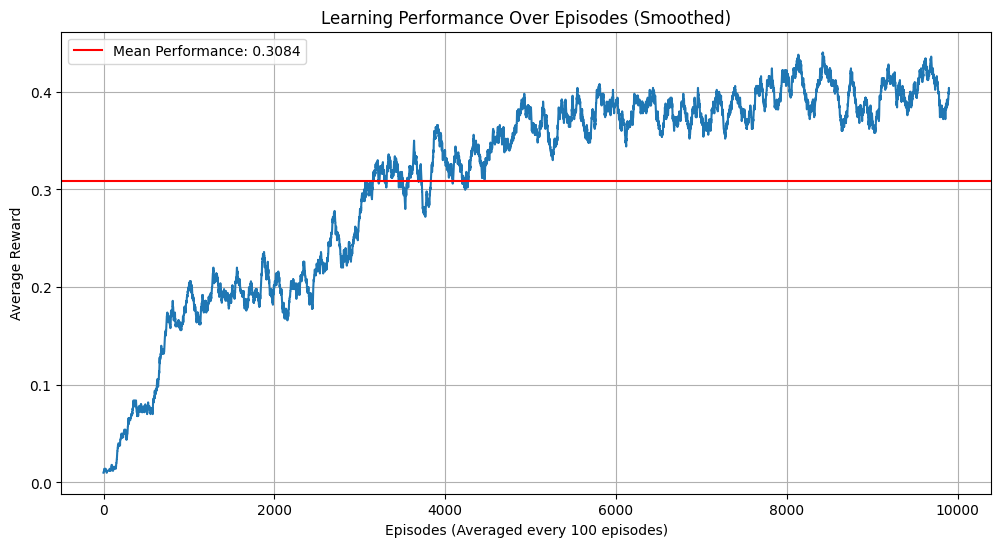

In [60]:
# Assuming mean_rewards contains the average rewards per episode
mean_performance = np.mean(mean_rewards)
std_dev_performance = np.std(mean_rewards)
median_performance = np.median(mean_rewards)
min_reward = np.min(mean_rewards)
max_reward = np.max(mean_rewards)

print(f"Average Learning Performance: {mean_performance:.4f}")
print(f"Standard Deviation: {std_dev_performance:.4f}")
print(f"Median Performance: {median_performance:.4f}")
print(f"Minimum Reward Achieved: {min_reward:.4f}")
print(f"Maximum Reward Achieved: {max_reward:.4f}")

# Plotting with annotations
plt.figure(figsize=(12, 6))
plt.plot(smoothed_rewards)
plt.title('Learning Performance Over Episodes (Smoothed)')
plt.xlabel('Episodes (Averaged every 100 episodes)')
plt.ylabel('Average Reward')
plt.axhline(y=mean_performance, color='r', linestyle='-', label=f"Mean Performance: {mean_performance:.4f}")
plt.legend()
plt.grid(True)
plt.show()


### Further Workings (Scratch)

In [3]:
import numpy as np
import gym

In [24]:
gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
n_observations = env.observation_space.n
n_actions = env.action_space.n

In [25]:
# initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [42]:
# number of episodes
n_episodes = 10000

# maximum number of iterations per episode
max_iter_episode = 100

# initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.01

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 1

#learning rate
lr = 0.1

# initialize rewards tracking list
rewards_per_episode = []

# iterate over episodes
for e in range(n_episodes):
    # initialize the first state of the episode
    current_state, _ = env.reset()  # Extract the state index
    done = False
    
    # sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode):
        # Introduce Stochastity:
        # sample a float from a U~(0,1)
        # IF the sampled float is less than the exploration probability,
        #     agent will select a random action
        # ELSE it exploits its knowledge using the Bellman equation
        
        if np.random.uniform(0, 1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state, :])
        
        # the environment runs the chosen action, returning 
        # the next state, a reward, and 'true' if the episode has ended
        next_state, reward, done, other_flag, info = env.step(action)
        
        # extract the state index from next_state
        next_state = next_state[0] if isinstance(next_state, tuple) else next_state
        
        # update Q-table using the Q-learning iteration
        Q_table[current_state, action] = (1 - lr) * Q_table[current_state, action] + lr * (reward + gamma * np.max(Q_table[next_state, :]))
        total_episode_reward += reward
        
        # if the episode has finished, leave the for loop
        if done:
            break
        
        current_state = next_state
    # update exploration probability using the exponential decay formula
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay * e))
    rewards_per_episode.append(total_episode_reward)


print("Mean reward per thousand episodes")
for i in range(10):
    print(f"{(i+1)*1000}: mean episode reward: {np.mean(rewards_per_episode[1000*i:1000*(i+1)])}")



Mean reward per thousand episodes
1000: mean episode reward: 0.043
2000: mean episode reward: 0.014
3000: mean episode reward: 0.024
4000: mean episode reward: 0.029
5000: mean episode reward: 0.011
6000: mean episode reward: 0.021
7000: mean episode reward: 0.015
8000: mean episode reward: 0.006
9000: mean episode reward: 0.016
10000: mean episode reward: 0.016


Mean reward per thousand episodes
1000: mean episode reward: 0.08220000000000001
2000: mean episode reward: 0.16920000000000002
3000: mean episode reward: 0.2106
4000: mean episode reward: 0.29740000000000005
5000: mean episode reward: 0.389
6000: mean episode reward: 0.5094
7000: mean episode reward: 0.513
8000: mean episode reward: 0.5294
9000: mean episode reward: 0.5515999999999999
10000: mean episode reward: 0.5231999999999999


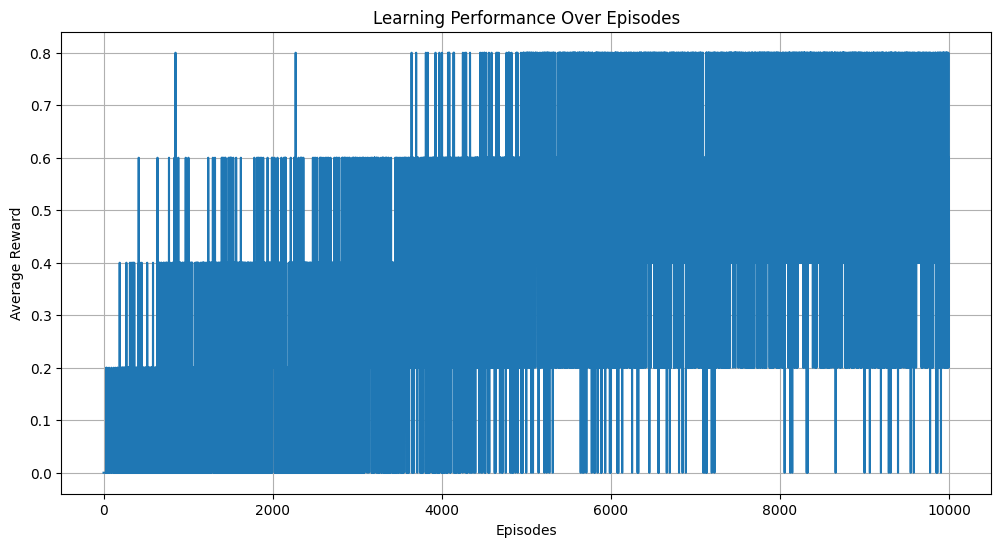

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Set up the environment
env = gym.make('FrozenLake-v1', is_slippery=True)

# Parameters
num_runs = 5
all_rewards = []

for run in range(num_runs):
    np.random.seed(run)  # Set the seed for reproducibility

    # Initialize Q-table
    Q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    n_episodes = 10000
    max_iter_episode = 100
    exploration_proba = 1  # Start with 1
    exploration_decreasing_decay = 0.01
    min_exploration_proba = 0.01
    gamma = 1
    lr = 0.1

    rewards_per_episode = []

    # Iterate over episodes
    for e in range(n_episodes):
        initial_state = env.reset()
        current_state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # Extract state index
        done = False
        total_episode_reward = 0
        
        for i in range(max_iter_episode):
            if np.random.uniform(0, 1) < exploration_proba:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[current_state, :])
            
            next_state, reward, done, other_flag, info = env.step(action)  # Environment step
            
            # Update Q-table using the Q-learning iteration
            Q_table[current_state, action] = (1 - lr) * Q_table[current_state, action] + lr * (reward + gamma * np.max(Q_table[next_state, :]))
            total_episode_reward += reward
            
            if done:
                break
            
            current_state = next_state if not isinstance(next_state, tuple) else next_state[0]
        
        exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay * e))
        rewards_per_episode.append(total_episode_reward)

    all_rewards.append(rewards_per_episode)

# Calculate and print the mean reward per thousand episodes
mean_rewards = np.mean(np.array(all_rewards), axis=0)  # Average over runs

print("Mean reward per thousand episodes")
for i in range(10):
    print(f"{(i+1)*1000}: mean episode reward: {np.mean(mean_rewards[1000*i:1000*(i+1)])}")

# Plotting the learning curve
plt.figure(figsize=(12, 6))
plt.plot(mean_rewards)
plt.title('Learning Performance Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()
